### <span style="color:#FFD600">The Goal is to Predict Weekly Sales

### <span style="color:#77DD77"> Importing Neccesary Libraries and Data

In [395]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [396]:
features = pd.read_csv(r'C:\DSML bootcamp\Final Project\features.csv')
stores = pd.read_csv(r'C:\DSML bootcamp\Final Project\stores.csv')
train = pd.read_csv(r'C:\DSML bootcamp\Final Project\train.csv')
test = pd.read_csv(r'C:\DSML bootcamp\Final Project\test.csv')

### <span style="color:#77DD77"> Data Cleaning

In [397]:
# --- Show all columns when displaying DataFrames ---
pd.set_option('display.max_columns', None)

#### <span style="color:#89CFF0"> Features table

In [398]:
features.head() # Show first 5 rows of the DataFrame

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [399]:
features.shape # Get number of rows and columns

(8190, 12)

In [400]:
features.dtypes # Show data type of each column

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [401]:
features.info() # Summary of DataFrame: columns, non-null counts, and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [402]:
features.duplicated().sum() # Count duplicate rows in the DataFrame

np.int64(0)

In [403]:
features.isnull().sum() # Count missing values in each column

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [404]:
features.nunique() # Count unique values per column

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [405]:
features.describe() # Summary statistics for numeric columns

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


##### <span style="color:#30D5C8"> Date conversion

In [406]:
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True) # Convert 'Date' column to datetime format (day comes first)

In [407]:
features.dtypes # Check data types after conversion

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

#### <span style="color:#89CFF0"> Stores table

In [408]:
stores.head() # Show first 5 rows of the DataFrame

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [409]:
stores.shape # Get number of rows and columns

(45, 3)

In [410]:
stores.info() # Summary of DataFrame: columns, non-null counts, and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [411]:
stores.isnull().sum() # Count missing values in each column

Store    0
Type     0
Size     0
dtype: int64

In [412]:
stores.duplicated().sum() # Count duplicate rows in the DataFrame

np.int64(0)

In [413]:
stores.dtypes # Show data type of each column

Store     int64
Type     object
Size      int64
dtype: object

In [414]:
stores.nunique() # Count unique values per column

Store    45
Type      3
Size     40
dtype: int64

In [415]:
stores.describe() # Summary statistics for numeric columns

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


#### <span style="color:#89CFF0"> Train table

In [416]:
train.head() # Show first 5 rows of the DataFrame

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [417]:
train.shape # Show data type of each column

(421570, 5)

In [418]:
train.info() # Summary of DataFrame: columns, non-null counts, and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [419]:
train.isnull().sum() # Count missing values in each column

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [420]:
train.duplicated().sum() # Count duplicate rows in the DataFrame

np.int64(0)

In [421]:
train.dtypes # Show data type of each column

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [422]:
train.nunique() # Count unique values per column

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [423]:
train.describe() # Summary statistics for numeric columns

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


##### <span style="color:#30D5C8"> Date conversion

In [424]:
train['Date'] = pd.to_datetime(train['Date'], dayfirst=True) # Convert 'Date' column to datetime format (day comes first)

In [425]:
train.dtypes # Check data types after conversion

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

#### <span style="color:#89CFF0"> Test table

In [426]:
test.head() # Show first 5 rows of the DataFrame

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [427]:
test.shape # Show data type of each column

(115064, 4)

In [428]:
test.info() # Summary of DataFrame: columns, non-null counts, and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [429]:
test.isnull().sum() # Count missing values in each column

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [430]:
test.duplicated().sum() # Count duplicate rows in the DataFrame

np.int64(0)

In [431]:
test.dtypes # Show data type of each column

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [432]:
test.nunique() # Count unique values per column

Store        45
Dept         81
Date         39
IsHoliday     2
dtype: int64

In [433]:
test.describe() # Summary statistics for numeric columns

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


##### <span style="color:#30D5C8"> Date conversion

In [434]:
test['Date'] = pd.to_datetime(test['Date']) # Convert 'Date' column to datetime format (day comes first)

In [435]:
test.dtypes # Check data types after conversion

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday              bool
dtype: object

### <span style="color:#77DD77"> Merging Tables

In [436]:
train_merge = train.merge(stores, on='Store', how='left') # Merge 'train' with 'stores' on 'Store' column using a left join

In [437]:
merged_data = train_merge.merge (features, on=['Store','Date'], how='left') # Merge 'train_merge' with 'features' on 'Store' and 'Date' using a left join

In [438]:
if (merged_data['IsHoliday_x'] == merged_data['IsHoliday_y']).all():  
    # Check if all values in 'IsHoliday_x' and 'IsHoliday_y' are the same
    print("IsHoliday_x and IsHoliday_y are exactly the same, we can drop one column")
else:
    print("IsHoliday_x and IsHoliday_y columns differ in some rows")  
    # Print message if there are differences

IsHoliday_x and IsHoliday_y are exactly the same, we can drop one column


In [439]:
merged_data = merged_data.drop('IsHoliday_y', axis=1) # Drop the duplicate 'IsHoliday_y' column

In [440]:
merged_data = merged_data.rename(columns={'IsHoliday_x' : 'IsHoliday'}) # Rename 'IsHoliday_x' to 'IsHoliday' for clarity

In [441]:
merged_data # Display the merged DataFrame

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


##### <span style="color:#89CFF0"> Data Cleaning Merged Table

In [442]:
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']  
# List of markdown columns

merged_data[markdown_columns] = merged_data[markdown_columns].fillna(0)  
# Fill missing values in markdown columns with 0

In [443]:
merged_data.isnull().sum()  # Count missing values in each column

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

In [444]:
merged_data["Total_MarkDown"] = merged_data[markdown_columns].sum(axis=1)  
# Create new column with row-wise sum of all markdown columns

In [445]:
merged_data["Year"] = merged_data['Date'].dt.year      # Extract year from 'Date'
merged_data['Month'] = merged_data['Date'].dt.month    # Extract month from 'Date'
merged_data['Quarter'] = merged_data['Date'].dt.quarter  # Extract quarter from 'Date'

In [446]:
def get_season(month):  
    # Function to map month number to a season
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Fall'

merged_data['Season'] = merged_data['Month'].apply(get_season)  
# Create 'Season' column by applying get_season to 'Month'

In [447]:
merged_data  # Display the updated DataFrame

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_MarkDown,Year,Month,Quarter,Season
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.00,2010,2,1,Winter
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0.00,2010,2,1,Winter
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0.00,2010,2,1,Winter
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0.00,2010,2,1,Winter
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0.00,2010,3,1,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,9468.01,2012,9,3,Fall
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,9659.00,2012,10,4,Fall
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,6554.03,2012,10,4,Fall
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,3982.42,2012,10,4,Fall


In [448]:
#excel = merged_data.to_csv("New_Table.csv", index=False) 

### <span style="color:#77DD77"> Merged Table Summary

In [449]:
print("1. GENERAL INFORMATION ABOUT THE UPDATED DATASET")  
# Title for general dataset info section

print("=" * 55)  
# Print a separator line

print(f"Dataset dimensions: {merged_data.shape}")  
# Show number of rows and columns

print(f"Data period: {merged_data['Date'].min().strftime('%d/%m/%Y')} to {merged_data['Date'].max().strftime('%d/%m/%Y')}")  
# Show start and end dates in the dataset

print(f"Number of stores: {merged_data['Store'].nunique()}")  
# Show unique number of stores

print(f"Number of departments: {merged_data['Dept'].nunique()}")  
# Show unique number of departments

1. GENERAL INFORMATION ABOUT THE UPDATED DATASET
Dataset dimensions: (421570, 21)
Data period: 05/02/2010 to 26/10/2012
Number of stores: 45
Number of departments: 81


In [450]:
# Check column data types
print("Column data types:")  
# Print all columns with their dtypes
print(merged_data.dtypes)

# Separate categorical and numerical columns
categorical_cols = merged_data.select_dtypes(include=['object', 'category']).columns  
# Select categorical columns
numerical_cols   = merged_data.select_dtypes(include=['number']).columns  
# Select numerical columns

print("\nCategorical columns:")  
# Print list of categorical columns
print(list(categorical_cols))

print("\nNumerical columns:")  
# Print list of numerical columns
print(list(numerical_cols))


Column data types:
Store                      int64
Dept                       int64
Date              datetime64[ns]
Weekly_Sales             float64
IsHoliday                   bool
Type                      object
Size                       int64
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDown5                float64
CPI                      float64
Unemployment             float64
Total_MarkDown           float64
Year                       int32
Month                      int32
Quarter                    int32
Season                    object
dtype: object

Categorical columns:
['Type', 'Season']

Numerical columns:
['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Total_MarkDown', 'Year', 'Month', 'Quarter']


### <span style="color:#77DD77"> EDA (Exploratory Data Analysis)

#### <span style="color: #FFD1DC;"> Train Table

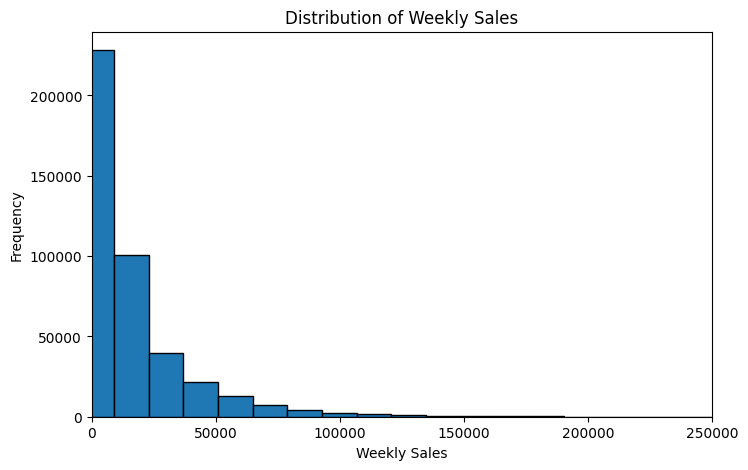

In [513]:
# --- Target variable distribution ---
plt.figure(figsize=(8,5))  # Set figure size
plt.hist(train["Weekly_Sales"], bins=50, edgecolor="k")  # Histogram of Weekly_Sales
plt.title("Distribution of Weekly Sales")  # Plot title
plt.xlabel("Weekly Sales")  # X-axis label
plt.ylabel("Frequency")  # Y-axis label
plt.xlim(0, 250000)  # Limit X-axis to 0–200,000
plt.show()  # Display the plot

The histogram shows the distribution of weekly sales, which is highly right-skewed. Most sales values are concentrated at lower levels (below 25,000), while higher sales are less frequent and gradually decrease as the amount increases.

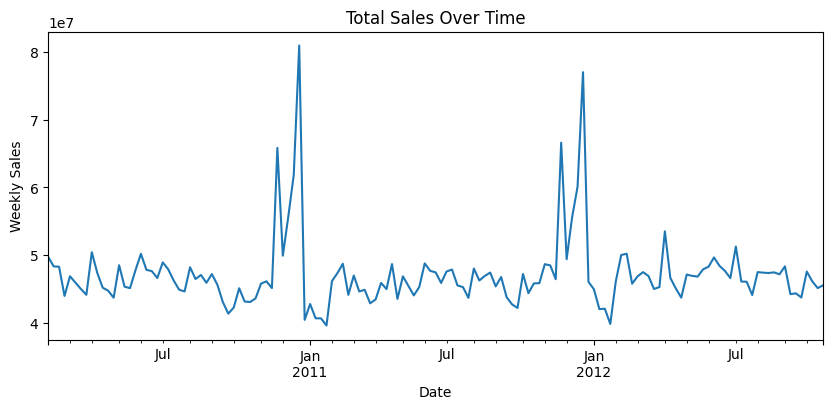

In [509]:
# --- Sales over time ---
train.groupby("Date")["Weekly_Sales"].sum().plot(figsize=(10,4))
plt.title("Total Sales Over Time")
plt.ylabel("Weekly Sales")
plt.show()

The time series plot shows weekly sales over time, with overall stable values between 40 and 50 million. However, there are noticeable spikes around the end of 2010 and 2011, suggesting seasonal peaks, likely related to holiday shopping periods.

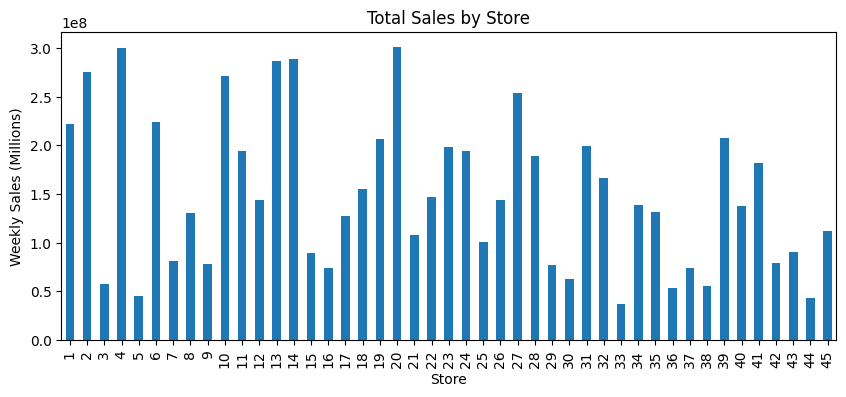

In [519]:
# --- Sales by store ---
train.groupby("Store")["Weekly_Sales"].sum().plot(kind="bar", figsize=(10,4)) # Sum sales per store and plot as bar chart
plt.title("Total Sales by Store")  # Plot title
plt.ylabel("Weekly Sales (Millions)")  # Y-axis label
plt.show()  # Display the plot

The bar chart displays total sales by store, expressed in millions. Sales vary significantly across the 45 stores, with some stores (such as 4, 14, 20, and 21) reaching peaks of around 300 million, while others report much lower totals, below 50 million. This indicates notable differences in performance among stores.

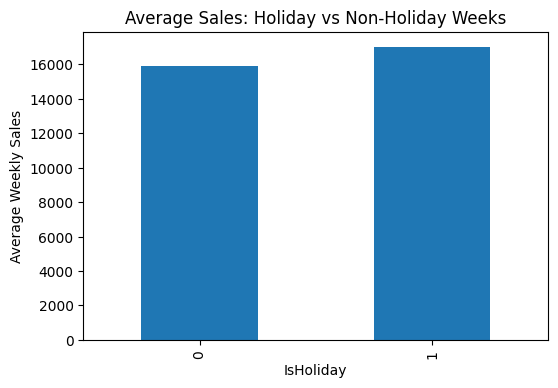

In [506]:
# --- Holiday impact on sales ---
train.groupby("IsHoliday")["Weekly_Sales"].mean().plot(kind="bar", figsize=(6,4))  # Average sales by holiday flag
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")  # Plot title
plt.ylabel("Average Weekly Sales")  # Y-axis label
plt.show()  # Display the plot

Average weekly sales are slightly higher during holiday weeks compared to non-holiday weeks.

#### <span style="color: #FFD1DC;"> Merged Table

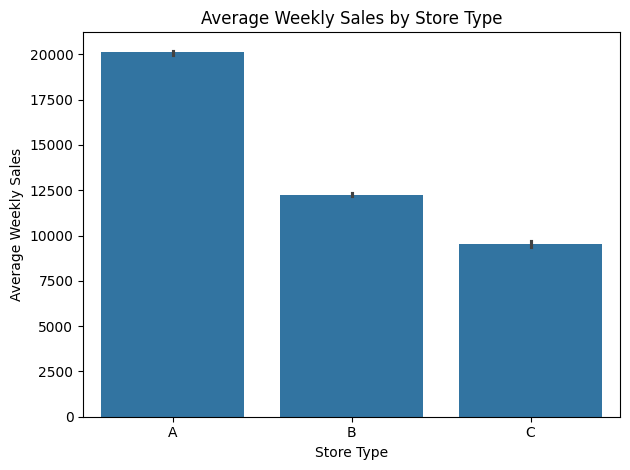

In [510]:
sns.barplot(data=merged_data, x='Type', y='Weekly_Sales', estimator='mean')
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

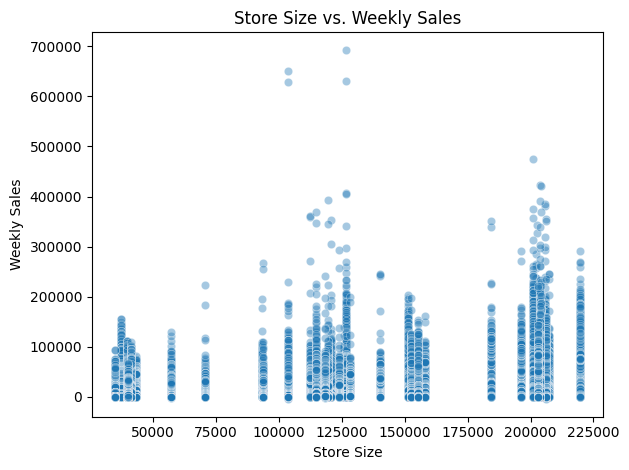

In [514]:
sns.scatterplot(data=merged_data, x='Size', y='Weekly_Sales', alpha=0.4)
plt.title('Store Size vs. Weekly Sales')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

The plot shows a wide spread of weekly sales across all store sizes, with many points clustered at certain size ranges and several high-sales outliers above 600,000.

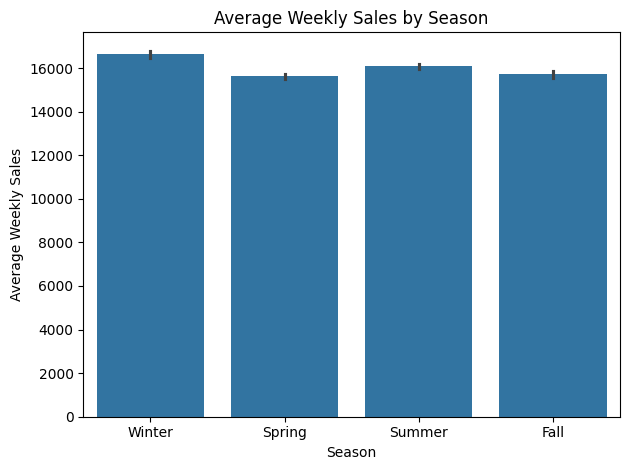

In [515]:
sns.barplot(data=merged_data, x='Season', y='Weekly_Sales',
            estimator='mean', order=['Winter','Spring','Summer','Fall'])
plt.title('Average Weekly Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

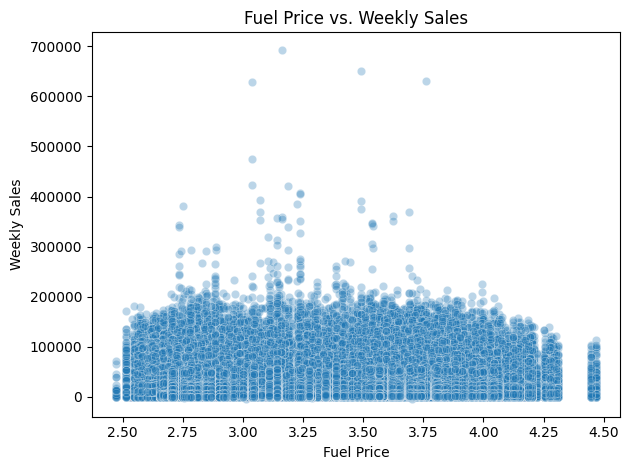

In [516]:
sns.scatterplot(data=merged_data, x='Fuel_Price', y='Weekly_Sales', alpha=0.3)
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

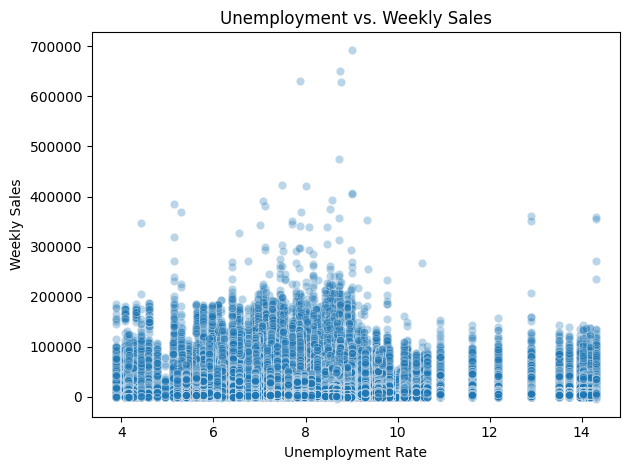

In [517]:
sns.scatterplot(data=merged_data, x='Unemployment', y='Weekly_Sales', alpha=0.3)
plt.title('Unemployment vs. Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

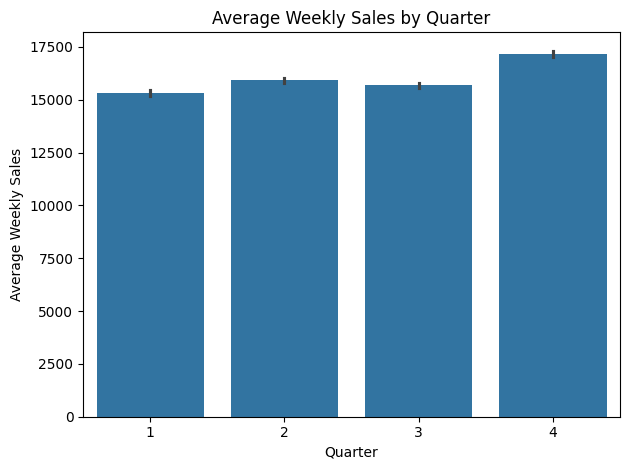

In [518]:
sns.barplot(data=merged_data, x='Quarter', y='Weekly_Sales', estimator='mean')
plt.title('Average Weekly Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

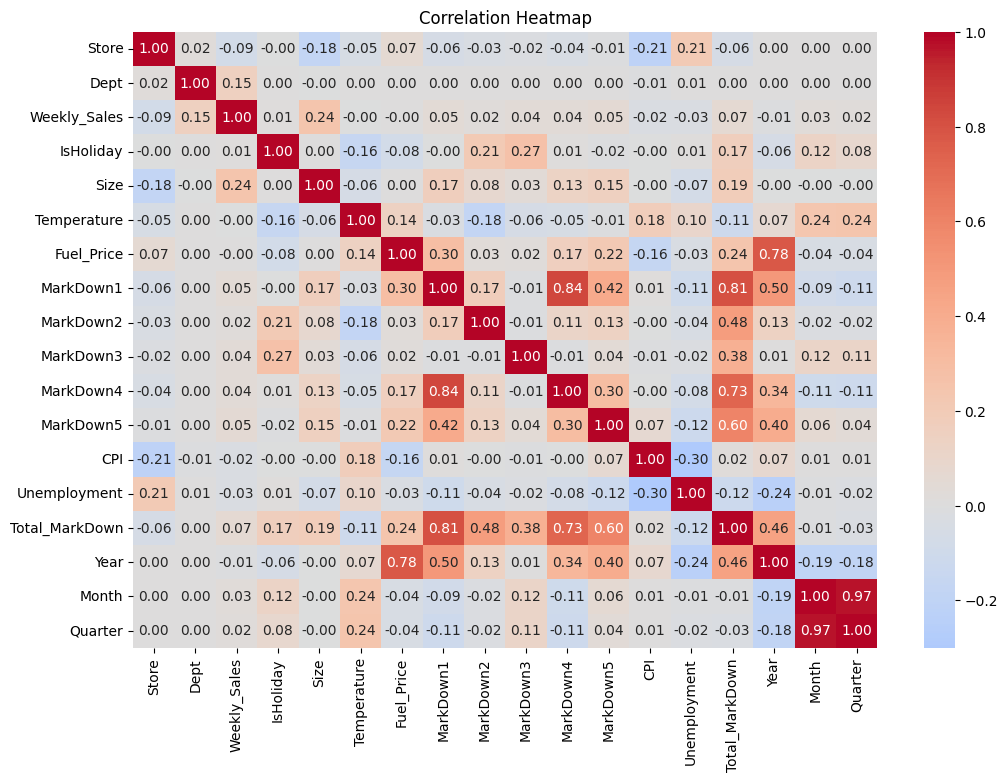

In [522]:
# --- Numeric correlations ---
plt.figure(figsize=(12,8))  # Set figure size
sns.heatmap(
    merged_data.corr(numeric_only=True),  # Compute correlations between numeric columns
    annot=True, fmt=".2f", cmap="coolwarm", center=0  # Show values, format to 2 decimals, use color map
)
plt.title("Correlation Heatmap")  # Add title
plt.show()  # Display the heatmap


The heatmap shows strong positive correlations among the different MarkDown features and between Month and Quarter, while other variables have mostly weak relationships.

### <span style="color:#77DD77"> Machine Learning Approach

#### <span style="color: #FFD1DC;"> Train Table

In [467]:
train # Shows top 5 rows by default

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [468]:
# Convert IsHoliday from boolean to integer (0 = False, 1 = True)
train["IsHoliday"] = train["IsHoliday"].astype(int)

In [469]:
train['year'] = train['Date'].dt.year      # Year from Date
train['month'] = train['Date'].dt.month    # Month from Date
train['day'] = train['Date'].dt.day        # Day from Date
train["DayOfWeek"] = train["Date"].dt.dayofweek  # Day of week (0=Monday, 6=Sunday)

##### <span style="color:#89CFF0"> Split 80% - 20% by Date

In [470]:
# --- Chronological train-test split ---
train_sorted = train.sort_values('Date')  # Sort data by date

split_index = int(len(train_sorted) * 0.8)  # 80% split index

# Split into training and testing sets
train_data = train_sorted.iloc[:split_index]  
test_data = train_sorted.iloc[split_index:]  

# Print sizes and date ranges
print(f"Original size: {len(train)}")
print(f"Train size: {len(train_data)} ({len(train_data)/len(train)*100:.1f}%)")
print(f"Test size: {len(test_data)} ({len(test_data)/len(train)*100:.1f}%)")

print(f"\nTrain date range: {train_data['Date'].min()} to {train_data['Date'].max()}")
print(f"Test date range: {test_data['Date'].min()} to {test_data['Date'].max()}")


Original size: 421570
Train size: 337256 (80.0%)
Test size: 84314 (20.0%)

Train date range: 2010-02-05 00:00:00 to 2012-04-13 00:00:00
Test date range: 2012-04-13 00:00:00 to 2012-10-26 00:00:00


##### <span style="color:#89CFF0"> X and y Split

In [471]:
# --- Select features and target ---
X_train = train_data[["Store","Dept","IsHoliday", "year", "month", "day", "DayOfWeek"]]  # Training features
y_train = train_data[["Weekly_Sales"]]  # Training target

X_test = test_data[["Store","Dept","IsHoliday", "year", "month", "day", "DayOfWeek"]]  # Test features
y_test = test_data[["Weekly_Sales"]]  # Test target

In [472]:
# --- One-hot encode categorical features (Store and Dept) ---
X_train_prep = pd.get_dummies(X_train, columns=['Store','Dept'], drop_first=True)  # Training set
X_test_prep = pd.get_dummies(X_test, columns=['Store','Dept'], drop_first=True)    # Test set

# Align test columns with training columns (fill missing with 0)
X_test_prep = X_test_prep.reindex(columns=X_train_prep.columns, fill_value=0)

# Save training feature columns for later use
import pickle
with open("train_columns.pkl", "wb") as f:
    pickle.dump(X_train_prep.columns.tolist(), f)

##### <span style="color:#89CFF0"> Linear Regression

In [473]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Linear Regression model ---
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train)  # Train model

# Predictions
y_pred = lin_reg.predict(X_test)        # Test predictions
y_pred_train = lin_reg.predict(X_train) # Train predictions

# --- Evaluation ---
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)                       # Root MSE
r2_test = r2_score(y_test, y_pred)       # R² on test set
r2_train = r2_score(y_train, y_pred_train)  # R² on train set

print("Linear Regression Results:")
print(f"RMSE: {rmse:.2f}")
print(f"R² test: {r2_test:.4f}")
print(f"R² train: {r2_train:.4f}")

Linear Regression Results:
RMSE: 21596.99
R² test: 0.0316
R² train: 0.0304


In [530]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Linear Regression with One-Hot Encoded features ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)  # Train model with OHE features

# Predictions
y_pred = lin_reg.predict(X_test_prep)        # Test predictions
y_pred_train = lin_reg.predict(X_train_prep) # Train predictions

# --- Evaluation ---
mse = mean_squared_error(y_test, y_pred)  
rmse_OHE = np.sqrt(mse)                     # RMSE
r2_test_OHE = r2_score(y_test, y_pred)     # R² test
r2_train_OHE = r2_score(y_train, y_pred_train)  # R² train

print("Linear Regression (OHE) Results:")
print(f"RMSE: {rmse_OHE:.2f}")
print(f"R² test: {r2_test_OHE:.4f}")
print(f"R² train: {r2_train_OHE:.4f}")

Linear Regression (OHE) Results:
RMSE: 12151.61
R² test: 0.6934
R² train: 0.6497


##### <span style="color:#89CFF0"> Random Forest

In [475]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Create Random Forest model ---
rf_reg = RandomForestRegressor(
    n_estimators=200,   # Number of trees
    max_depth=15,       # Maximum depth of each tree (prevents overfitting)
    random_state=42,    # For reproducibility
    n_jobs=-1           # Use all available CPU cores
)

# --- Train model ---
rf_reg.fit(X_train_prep, y_train)

# --- Predictions ---
y_pred_rf = rf_reg.predict(X_test_prep)        # Test predictions
y_pred_train = rf_reg.predict(X_train_prep)   # Train predictions

# --- Evaluation ---
mse_rf = mean_squared_error(y_test, y_pred_rf)  
rmse_rf = np.sqrt(mse_rf)                       # RMSE
r2_test_rf = r2_score(y_test, y_pred_rf)       # R² test
r2_train_rf = r2_score(y_train, y_pred_train)  # R² train

print("Random Forest Regression Results:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² test: {r2_test_rf:.4f}")
print(f"R² train: {r2_train_rf:.4f}")


c:\Users\naatt\anaconda3\envs\walmart_forecasting\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regression Results:
RMSE: 12013.69
R² test: 0.7004
R² train: 0.6963


##### <span style="color:#89CFF0"> XGBoost

In [476]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Create XGBoost model ---
xgb_reg = XGBRegressor(
    n_estimators=200,      # Number of trees
    max_depth=15,          # Maximum depth per tree
    learning_rate=0.1,     # Learning rate
    subsample=0.8,         # Fraction of samples per tree (reduce overfitting)
    colsample_bytree=0.8,  # Fraction of features per tree
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)

# --- Train model ---
xgb_reg.fit(X_train_prep, y_train)

# --- Predictions ---
y_pred_xgb = xgb_reg.predict(X_test_prep)        # Test predictions
y_pred_train = xgb_reg.predict(X_train_prep)    # Train predictions

# --- Evaluation ---
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)                      # RMSE
r2_test_xgb = r2_score(y_test, y_pred_xgb)      # R² test
r2_train_xgb = r2_score(y_train, y_pred_train)  # R² train

print("XGBoost Regression Results:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² test: {r2_test_xgb:.4f}")
print(f"R² train: {r2_train_xgb:.4f}")


XGBoost Regression Results:
RMSE: 5312.81
R² test: 0.9414
R² train: 0.9492


##### <span style="color:#89CFF0"> Hyperparameters on best model - XGBoost

In [477]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# --- Define base XGBoost model ---
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# --- Hyperparameter search space ---
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "reg_alpha": [0, 0.01, 0.1, 1],  # L1 regularization
    "reg_lambda": [0.5, 1, 1.5, 2]   # L2 regularization
}

# --- Randomized search with cross-validation ---
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,                         # Number of random combinations
    scoring="neg_mean_squared_error",  # Optimization metric
    cv=3,                              # 3-fold CV
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# --- Fit search ---
random_search.fit(X_train_prep, y_train)

# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# --- Final model with best hyperparameters ---
best_xgb = random_search.best_estimator_

# --- Predictions ---
y_pred_xgb = best_xgb.predict(X_test_prep)
y_pred_train = best_xgb.predict(X_train_prep)

# --- Evaluation ---
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb_2 = np.sqrt(mse_xgb)
r2_test_xgb_2 = r2_score(y_test, y_pred_xgb)
r2_train_xgb_2 = r2_score(y_train, y_pred_train)

print("\nXGBoost Regression (Optimized) Results:")
print(f"RMSE: {rmse_xgb_2:.2f}")
print(f"R² test: {r2_test_xgb_2:.4f}")
print(f"R² train: {r2_train_xgb_2:.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best hyperparameters: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.01, 'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.8}

XGBoost Regression (Optimized) Results:
RMSE: 4088.19
R² test: 0.9653
R² train: 0.9781


In [478]:
import joblib
# --- Save the best XGBoost model to a file ---
joblib.dump(best_xgb, "best_xgb_model.pkl")  # Persist trained model

['best_xgb_model.pkl']

##### <span style="color:#89CFF0"> Conclusions

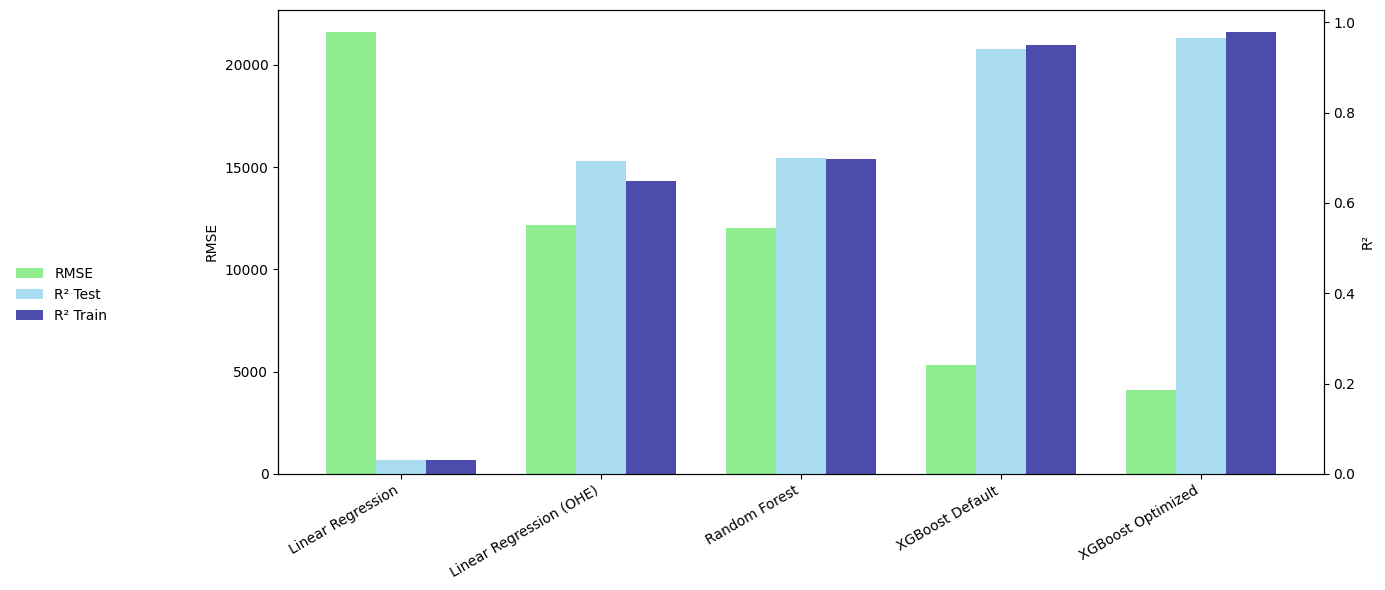

In [529]:
import matplotlib.pyplot as plt
import numpy as np

# --- Model names ---
models = [
    "Linear Regression",
    "Linear Regression (OHE)",
    "Random Forest",
    "XGBoost Default",
    "XGBoost Optimized"
]

# --- Metrics for each model ---
rmse_values = [
    rmse,        # Linear Regression
    rmse_OHE,    # Linear Regression (OHE)
    rmse_rf,     # Random Forest
    rmse_xgb,    # XGBoost Default
    rmse_xgb_2   # XGBoost Optimized
]

r2_test_values = [
    r2_test,        # Linear Regression
    r2_test_OHE,    # Linear Regression (OHE)
    r2_test_rf,     # Random Forest
    r2_test_xgb,    # XGBoost Default
    r2_test_xgb_2   # XGBoost Optimized
]

r2_train_values = [
    r2_train,       # Linear Regression
    r2_train_OHE,   # Linear Regression (OHE)
    r2_train_rf,    # Random Forest
    r2_train_xgb,   # XGBoost Default
    r2_train_xgb_2  # XGBoost Optimized
]

# --- Plot ---
x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12,6))

# RMSE bars
ax1.bar(x - width, rmse_values, width, label='RMSE', color='lightgreen')
ax1.set_ylabel('RMSE')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=30, ha='right')

# R² bars on secondary axis
ax2 = ax1.twinx()
ax2.bar(x, r2_test_values, width, label='R² Test', color='skyblue', alpha=0.7)
ax2.bar(x + width, r2_train_values, width, label='R² Train', color='darkblue', alpha=0.7)
ax2.set_ylabel('R²')

# --- Legend outside plot ---
fig.subplots_adjust(left=0.35)
fig.legend(loc='center left',
           bbox_to_anchor=(-0.15, 0.5),
           borderaxespad=0.,
           frameon=False)

plt.tight_layout()
plt.show()


#### <span style="color: #FFD1DC;"> Merged Table

In [480]:
merged_data # Shows combined data from train, stores, and features

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_MarkDown,Year,Month,Quarter,Season,Markdown_Category
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0.00,2010,2,1,Winter,No Markdown
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0.00,2010,2,1,Winter,No Markdown
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0.00,2010,2,1,Winter,No Markdown
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0.00,2010,2,1,Winter,No Markdown
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0.00,2010,3,1,Spring,No Markdown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,9468.01,2012,9,3,Fall,High (>$5K)
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,9659.00,2012,10,4,Fall,High (>$5K)
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,6554.03,2012,10,4,Fall,High (>$5K)
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,3982.42,2012,10,4,Fall,Medium ($1K-$5K)


In [481]:
# Convert 'IsHoliday' column to integer (0 = non-holiday, 1 = holiday)
merged_data["IsHoliday"] = merged_data["IsHoliday"].astype(int)


##### <span style="color:#89CFF0"> Split 80% - 20% by Date

In [482]:
# --- Sort merged data by date for chronological split ---
merged_data_sorted = merged_data.sort_values('Date')

# --- Determine split index for 80% train, 20% test ---
split_index = int(len(merged_data_sorted) * 0.8)

# --- Split dataset chronologically ---
train_merged_data = merged_data_sorted.iloc[:split_index]
test_merged_data = merged_data_sorted.iloc[split_index:]

# --- Print dataset sizes and date ranges ---
print(f"Original size: {len(merged_data)}")
print(f"Train size: {len(train_merged_data)} ({len(train_merged_data)/len(merged_data)*100:.1f}%)")
print(f"Test size: {len(test_merged_data)} ({len(test_merged_data)/len(merged_data)*100:.1f}%)")

print(f"\nTrain date range: {train_merged_data['Date'].min()} to {train_merged_data['Date'].max()}")
print(f"Test date range: {test_merged_data['Date'].min()} to {test_merged_data['Date'].max()}")


Original size: 421570
Train size: 337256 (80.0%)
Test size: 84314 (20.0%)

Train date range: 2010-02-05 00:00:00 to 2012-04-13 00:00:00
Test date range: 2012-04-13 00:00:00 to 2012-10-26 00:00:00


##### <span style="color:#89CFF0"> X and y Split

In [485]:
# --- Extract day and day of week for train and test ---
for df in [train_merged_data, test_merged_data]:
    df["day"] = df["Date"].dt.day
    df["DayOfWeek"] = df["Date"].dt.dayofweek  # Monday=0, Sunday=6

# --- Define features (X) and target (y) ---
features_to_drop = ["Date", "Weekly_Sales", "Season", "Year", "Month", "Markdown_Category"]

X_train = train_merged_data.drop(columns=features_to_drop)
y_train = train_merged_data[["Weekly_Sales"]]

X_test = test_merged_data.drop(columns=features_to_drop)
y_test = test_merged_data[["Weekly_Sales"]]

# --- Preview data ---
print(X_train.head())  # Features
print(y_train.head())  # Target


        Store  Dept  IsHoliday Type    Size  Temperature  Fuel_Price  \
0           1     1          0    A  151315        42.31       2.572   
277665     29     5          0    B   93638        24.36       2.788   
277808     29     6          0    B   93638        24.36       2.788   
277951     29     7          0    B   93638        24.36       2.788   
278094     29     8          0    B   93638        24.36       2.788   

        MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0             0.0        0.0        0.0        0.0        0.0  211.096358   
277665        0.0        0.0        0.0        0.0        0.0  131.527903   
277808        0.0        0.0        0.0        0.0        0.0  131.527903   
277951        0.0        0.0        0.0        0.0        0.0  131.527903   
278094        0.0        0.0        0.0        0.0        0.0  131.527903   

        Unemployment  Total_MarkDown  Quarter  day  DayOfWeek  
0              8.106             0.0    

C:\Users\naatt\AppData\Local\Temp\ipykernel_6304\1260205844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["day"] = df["Date"].dt.day
C:\Users\naatt\AppData\Local\Temp\ipykernel_6304\1260205844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DayOfWeek"] = df["Date"].dt.dayofweek  # Monday=0, Sunday=6
C:\Users\naatt\AppData\Local\Temp\ipykernel_6304\1260205844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

##### <span style="color:#89CFF0"> XGBoost

In [486]:
# --- Check data types of each column in merged_data ---
merged_data.dtypes

Store                         int64
Dept                          int64
Date                 datetime64[ns]
Weekly_Sales                float64
IsHoliday                     int64
Type                         object
Size                          int64
Temperature                 float64
Fuel_Price                  float64
MarkDown1                   float64
MarkDown2                   float64
MarkDown3                   float64
MarkDown4                   float64
MarkDown5                   float64
CPI                         float64
Unemployment                float64
Total_MarkDown              float64
Year                          int32
Month                         int32
Quarter                       int32
Season                       object
Markdown_Category          category
dtype: object

In [487]:
# --- Count the number of columns by data type in prepared training set ---
X_train_prep.dtypes.value_counts()

bool     124
int32      4
int64      1
Name: count, dtype: int64

In [488]:
# --- One-hot encode categorical columns for XGBoost ---
X_train_prep = pd.get_dummies(X_train, columns=['Store','Dept','Type'], drop_first=True)
X_test_prep = pd.get_dummies(X_test, columns=['Store','Dept','Type'], drop_first=True)

# --- Align test columns with train columns ---
X_test_prep = X_test_prep.reindex(columns=X_train_prep.columns, fill_value=0)

In [489]:

# --- Create and train XGBoost model ---
xgb_reg = XGBRegressor(
    n_estimators=200,
    max_depth=15,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_reg.fit(X_train_prep, y_train)

# --- Predictions ---
y_pred_xgb = xgb_reg.predict(X_test_prep)
y_pred_train = xgb_reg.predict(X_train_prep)

# --- Evaluation ---
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb_merged = np.sqrt(mse_xgb)
r2_test_xgb_merged = r2_score(y_test, y_pred_xgb)
r2_train_xgb_merged = r2_score(y_train, y_pred_train)

print("XGBoost Regression Results:")
print(f"RMSE: {rmse_xgb_merged:.2f}")
print(f"R² test: {r2_test_xgb_merged:.4f}")
print(f"R² train: {r2_train_xgb_merged:.4f}")

XGBoost Regression Results:
RMSE: 4605.29
R² test: 0.9560
R² train: 0.9768


In [490]:
# --- Preview first rows of prepared training features after one-hot encoding ---
X_train_prep.head()


,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Total_MarkDown,Quarter,day,DayOfWeek,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,Store_11,Store_12,Store_13,Store_14,Store_15,Store_16,Store_17,Store_18,Store_19,Store_20,Store_21,Store_22,Store_23,Store_24,Store_25,Store_26,Store_27,Store_28,Store_29,Store_30,Store_31,Store_32,Store_33,Store_34,Store_35,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45,Dept_2,Dept_3,Dept_4,Dept_5,Dept_6,Dept_7,Dept_8,Dept_9,Dept_10,Dept_11,Dept_12,Dept_13,Dept_14,Dept_16,Dept_17,Dept_18,Dept_19,Dept_20,Dept_21,Dept_22,Dept_23,Dept_24,Dept_25,Dept_26,Dept_27,Dept_28,Dept_29,Dept_30,Dept_31,Dept_32,Dept_33,Dept_34,Dept_35,Dept_36,Dept_37,Dept_38,Dept_39,Dept_40,Dept_41,Dept_42,Dept_43,Dept_44,Dept_45,Dept_46,Dept_47,Dept_48,Dept_49,Dept_50,Dept_51,Dept_52,Dept_54,Dept_55,Dept_56,Dept_58,Dept_59,Dept_60,Dept_65,Dept_67,Dept_71,Dept_72,Dept_74,Dept_77,Dept_78,Dept_79,Dept_80,Dept_81,Dept_82,Dept_83,Dept_85,Dept_87,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_B,Type_C
0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0.0,1,5,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
277665,0,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,0.0,1,5,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
277808,0,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,0.0,1,5,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
277951,0,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,0.0,1,5,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

#### <span style="color: #FFD1DC;"> Comparison Table

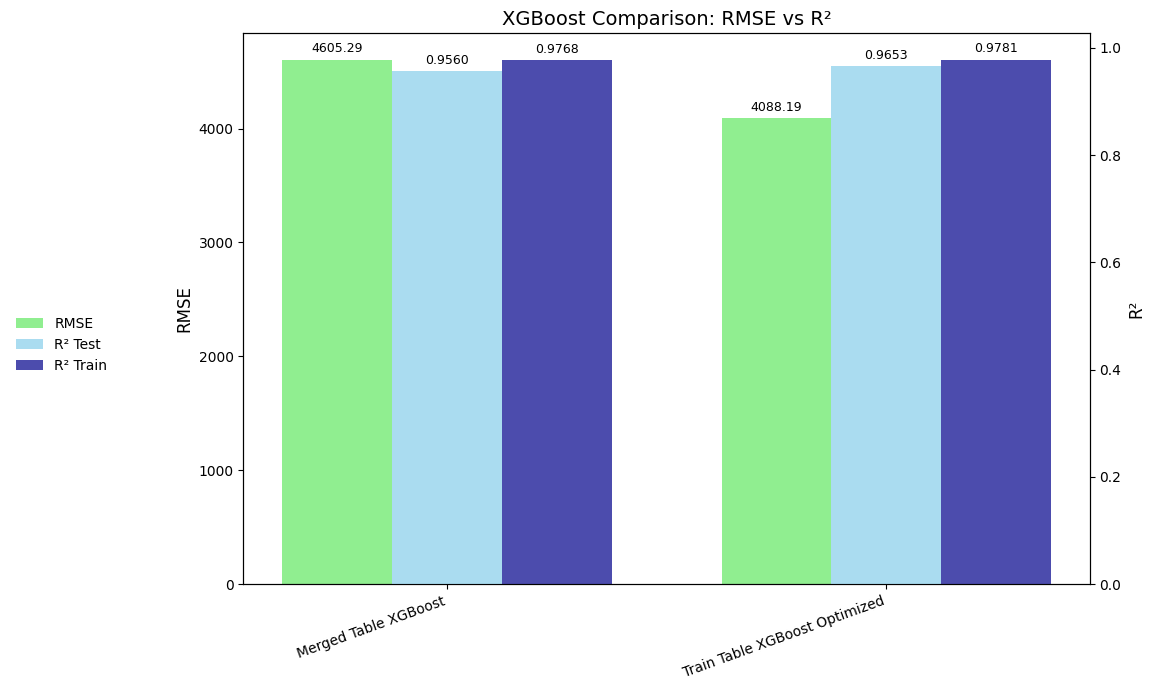

In [535]:
# --- Compare XGBoost performance between merged vs original train table ---
import matplotlib.pyplot as plt
import numpy as np

models = ["Merged Table XGBoost", "Train Table XGBoost Optimized"]

# Performance metrics
rmse_values     = [rmse_xgb_merged, rmse_xgb_2]
r2_test_values  = [r2_test_xgb_merged, r2_test_xgb_2]
r2_train_values = [r2_train_xgb_merged, r2_train_xgb_2]

x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(10,7))

# RMSE bars on left axis
bars_rmse = ax1.bar(x - width, rmse_values, width, label='RMSE', color='lightgreen')
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=20, ha='right')

# R² bars on right axis
ax2 = ax1.twinx()
bars_r2_test  = ax2.bar(x, r2_test_values,  width, label='R² Test',  color='skyblue', alpha=0.7)
bars_r2_train = ax2.bar(x + width, r2_train_values, width, label='R² Train', color='darkblue', alpha=0.7)
ax2.set_ylabel('R²', fontsize=12)

# Function to add value labels
def add_labels(bars, ax, fmt):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(fmt.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Add labels for RMSE and R²
add_labels(bars_rmse, ax1, "{:.2f}")
add_labels(bars_r2_test, ax2, "{:.4f}")
add_labels(bars_r2_train, ax2, "{:.4f}")

# Legend outside plot
fig.subplots_adjust(left=0.35)
fig.legend(loc='center left',
           bbox_to_anchor=(-0.15, 0.5),
           borderaxespad=0.,
           frameon=False)

plt.title("XGBoost Comparison: RMSE vs R²", fontsize=14)
plt.tight_layout()
plt.show()
